In [1]:
#Data Preprocessing:
import pandas as pd
df = pd.read_csv("G:\ExcelR\Data Science Assignments\Assignment 11\Recommendation System\\anime.CSV")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [2]:
  # Checking for missing values in each column
  missing_values = df.isnull().sum()

  # Handling missing values if any
  if missing_values.any():
    # Drop rows with missing values
    df = df.dropna()
    print(df)

       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      

In [20]:
print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.describe())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
(12017, 7)
Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')
anime_id      int64
name         object
g

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


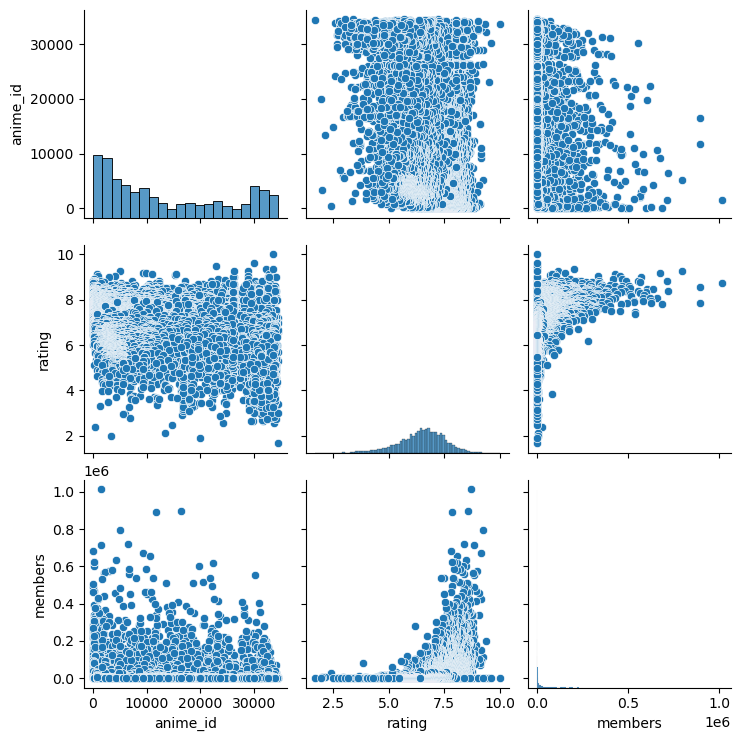

In [21]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

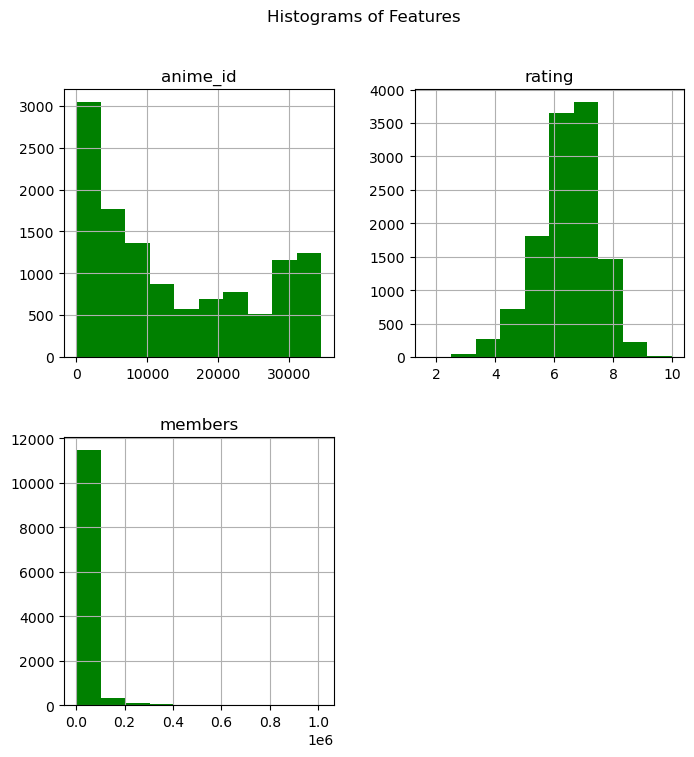

<Axes: >

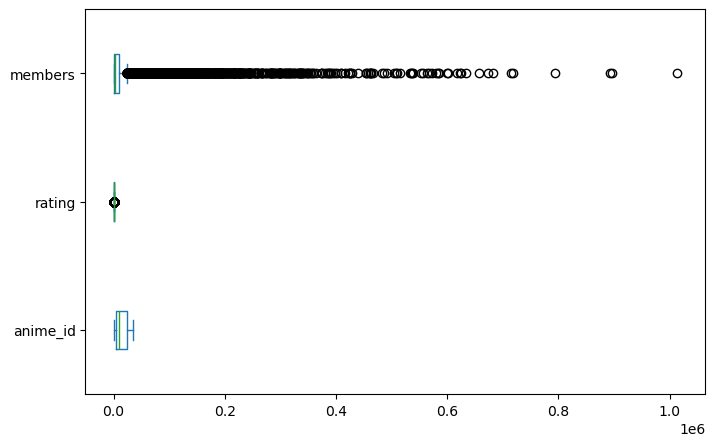

In [22]:
#Examine the distribution of features using histograms, box plots, or density plots
feature_columns = df.columns[:]  # Assuming the last column as target variable
df[feature_columns].hist(figsize=(8, 8),color = 'green') #length,Height 
plt.suptitle('Histograms of Features')
plt.show()

#Boxplot
df[feature_columns].plot(kind = 'box',vert=False, figsize=(8, 5)) #length,Height 

In [24]:
# Feature Extraction:
# Selecting features for computing similarity
features = ['genre', 'rating']

# Extracting the selected features from the DataFrame
feature_matrix = df[features]
print(feature_matrix.head())

                                               genre  rating
0               Drama, Romance, School, Supernatural    9.37
1  Action, Adventure, Drama, Fantasy, Magic, Mili...    9.26
2  Action, Comedy, Historical, Parody, Samurai, S...    9.25
3                                   Sci-Fi, Thriller    9.17
4  Action, Comedy, Historical, Parody, Samurai, S...    9.16


In [5]:
import pandas as pd
# Converting categorical features into numerical representations using one-hot encoding
encoded_features = pd.get_dummies(feature_matrix)

# Printing the encoded features
print(encoded_features.head())

   rating  genre_Action  genre_Action, Adventure  \
0    9.37         False                    False   
1    9.26         False                    False   
2    9.25         False                    False   
3    9.17         False                    False   
4    9.16         False                    False   

   genre_Action, Adventure, Cars, Comedy, Sci-Fi, Shounen  \
0                                              False        
1                                              False        
2                                              False        
3                                              False        
4                                              False        

   genre_Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports  \
0                                              False               
1                                              False               
2                                              False               
3                                              F

In [6]:
# Getting the numerical features
numerical_features = encoded_features.select_dtypes(include=['int64', 'float64'])

# Normalizing the numerical features using min-max scaling
normalized_features = (numerical_features - numerical_features.min()) / (numerical_features.max() - numerical_features.min())

# Replacing the original numerical features with the normalized features
encoded_features[numerical_features.columns] = normalized_features

# Printing the normalized features
print(encoded_features.head())

     rating  genre_Action  genre_Action, Adventure  \
0  0.924370         False                    False   
1  0.911164         False                    False   
2  0.909964         False                    False   
3  0.900360         False                    False   
4  0.899160         False                    False   

   genre_Action, Adventure, Cars, Comedy, Sci-Fi, Shounen  \
0                                              False        
1                                              False        
2                                              False        
3                                              False        
4                                              False        

   genre_Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports  \
0                                              False               
1                                              False               
2                                              False               
3                                   

In [7]:
#Recommendation System:
import numpy as np

def recommend_anime(encoded_features, title):

  # Getting the index of the anime with the given title
  index = encoded_features[encoded_features['title'] == title].index[0]

  # Calculating the cosine similarity between the anime and all other anime
  similarity_scores = encoded_features.iloc[index].dot(encoded_features.T) / (np.linalg.norm(encoded_features.iloc[index]) * np.linalg.norm(encoded_features, axis=1))

  # Getting the indices of the most similar anime
  similar_indices = similarity_scores.sort_values(ascending=False)[1:11].index.tolist()

  # Getting the titles of the most similar anime
  recommended_anime = encoded_features.iloc[similar_indices]['title'].tolist()

  return recommended_anime


In [8]:
#Displaying only the rating given and remaining as NaN vaule.
# 2 - Feature Extraction & computing similarity
user_df = df.pivot(index='anime_id',columns='type',values='rating')
user_df.fillna(00, inplace = True) # Filling NaNs with 00values
user_df

type,Movie,Music,ONA,OVA,Special,TV
anime_id,,,,,,
1,0.0,0.0,0.00,0.0,0.00,8.82
5,8.4,0.0,0.00,0.0,0.00,0.00
6,0.0,0.0,0.00,0.0,0.00,8.32
7,0.0,0.0,0.00,0.0,0.00,7.36
8,0.0,0.0,0.00,0.0,0.00,7.06
...,...,...,...,...,...,...
34476,0.0,0.0,0.00,0.0,1.67,0.00
34490,0.0,0.0,0.00,0.0,0.00,3.00
34503,0.0,0.0,0.00,0.0,0.00,3.40


In [9]:
#3-Recommendation System
# Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
user_sim = 1 - pairwise_distances(user_df.values,metric='cosine')
user_sim

array([[1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
#Evaluation
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, df['rating'], test_size=0.2, random_state=42)

# Print the number of samples in each set
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")


Number of training samples: 9613
Number of testing samples: 2404


In [ ]:
#printing precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the predicted ratings for the test set
predicted_ratings = model.predict(X_test)

# Binarize the predicted ratings
predicted_ratings[predicted_ratings >= 0.5] = 1
predicted_ratings[predicted_ratings < 0.5] = 0

# Calculate the precision, recall, and F1-score
precision = precision_score(y_test, predicted_ratings)
recall = recall_score(y_test, predicted_ratings)
f1_score = f1_score(y_test, predicted_ratings)

# Print the evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
